In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../plot_helpers/")
plt.style.use(["../plot_helpers/prl_paper.mplstyle"])
from plot_helper_for_paper import set_size, plot_imshow, plot_contourf

import pandas as pd
from matplotlib.gridspec import GridSpec

In [2]:
ad_timings = pd.read_csv("timing_hyperelastic_automatic.txt", sep=" ", header=None)
sd_timings = pd.read_csv("timing_hyperelastic_standard.txt", sep=" ", header=None)

ad_ep_timings = pd.read_csv(
    "timing_elastoplastic_automatic-linearize.txt", sep=" ", header=None
)
sd_ep_timings = pd.read_csv("timing_elastoplastic_standard.txt", sep=" ", header=None)

In [3]:
ad_memory = np.loadtxt("memory_hyperelastic_automatic.txt", delimiter=",")
sd_memory = np.loadtxt("memory_hyperelastic_standard.txt", delimiter=",")

ad_ep_memory = np.loadtxt("memory_elastoplastic_automatic-linearize.txt", delimiter=",")
sd_ep_memory = np.loadtxt("memory_elastoplastic_standard.txt", delimiter=",")

In [4]:
mean_ad_timings = ad_timings.groupby(0).mean().reset_index()
mean_sd_timings = sd_timings.groupby(0).mean().reset_index()

mean_ep_ad_timings = ad_ep_timings.groupby(0).mean().reset_index()
mean_ep_sd_timings = sd_ep_timings.groupby(0).mean().reset_index()

In [5]:
from matplotlib import ticker

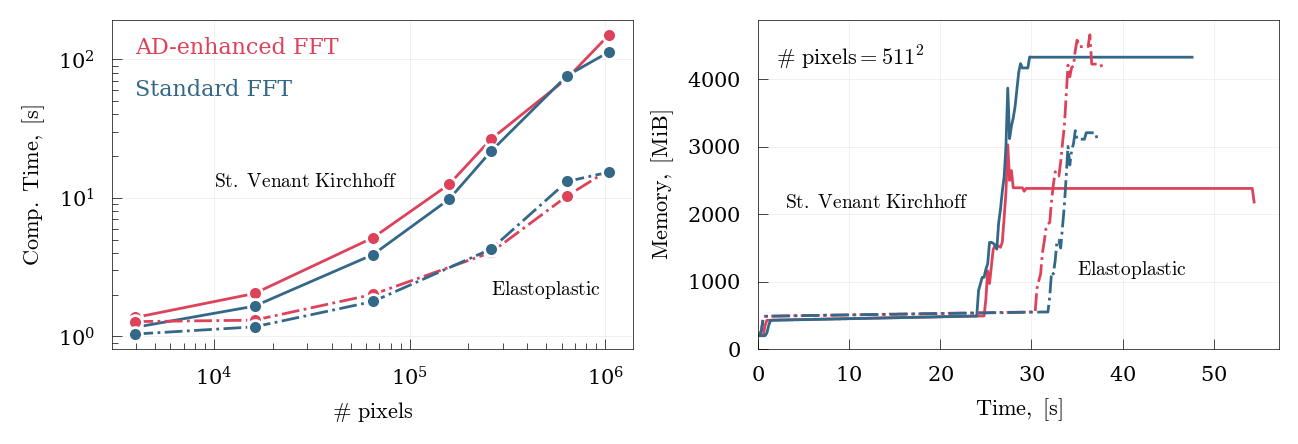

In [7]:
fig = plt.figure(
    figsize=set_size(width="two-column", fraction=0.9, height_ratio=0.33),
    constrained_layout=True,
    dpi=200,
)
gs1 = GridSpec(1, 2, figure=fig, width_ratios=[1, 1])

ax = fig.add_subplot(gs1[0, 0])

ax.loglog(
    np.asarray(mean_ad_timings[0].tolist()) ** 2,
    mean_ad_timings[1].tolist(),
    marker="o",
    color="#de425b",
    markeredgecolor="w",
    markersize=5,
    markeredgewidth=1,
)
ax.loglog(
    np.asarray(mean_sd_timings[0].tolist()) ** 2,
    mean_sd_timings[1].tolist(),
    marker="o",
    color="#346888",
    markeredgecolor="w",
    markersize=5,
    markeredgewidth=1,
)

ax.loglog(
    np.asarray(mean_ep_ad_timings[0].tolist()) ** 2,
    mean_ep_ad_timings[1].tolist(),
    ls="dashdot",
    marker="o",
    color="#de425b",
    markeredgecolor="w",
    markersize=5,
    markeredgewidth=1,
)
ax.loglog(
    np.asarray(mean_ep_sd_timings[0].tolist()) ** 2,
    mean_ep_sd_timings[1].tolist(),
    ls="dashdot",
    marker="o",
    color="#346888",
    markeredgecolor="w",
    markersize=5,
    markeredgewidth=1,
)

#ax.set_xticks(
#    np.asarray([63, 127, 255, 511, 1023]) ** 2,
#    [r"$63^2$", r"$127^2$", r"$255^2$", r"$511^2$", r"$1023^2$"],
#    fontsize=7,
#)



ax.set_xlabel(r"$\# \mathrm{~pixels}$")
ax.set_ylabel(r"$\mathrm{Comp.~Time,~[s]}$")
ax.grid(which="major", axis="both", linestyle='solid', alpha=0.15)
ax.text(63 * 63, 110, r"AD-enhanced FFT", fontsize=8, color="#de425b")
ax.text(63 * 63, 55, r"Standard FFT", fontsize=8, color="#346888")

ax.text(100 * 100, 12, r"$\mathrm{St.~Venant~Kirchhoff}$", fontsize=7, color="k")
ax.text(511 * 511, 2, r"$\mathrm{Elastoplastic}$", fontsize=7, color="k")


# ax.set_aspect(1/ax.get_data_ratio())


ax = fig.add_subplot(gs1[0, 1])
ax.plot(np.arange(0, len(ad_memory)) * 0.2, ad_memory, color="#de425b")
ax.plot(np.arange(0, len(sd_memory)) * 0.2, sd_memory, color="#346888")

ax.plot(
    np.arange(0, len(ad_ep_memory)) * 0.2,
    ad_ep_memory,
    color="#de425b",
    ls="dashdot",
)
ax.plot(
    np.arange(0, len(sd_ep_memory)) * 0.2, sd_ep_memory, color="#346888", ls="dashdot"
)


ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
ax.set_xlabel(r"$\mathrm{Time,~[s]}$")
ax.set_ylabel(r"$\mathrm{Memory,~[MiB]}$")
ax.grid(which="both", linestyle='solid', alpha=0.15)
# ax.set_aspect(1/ax.get_data_ratio())
ax.text(2, 4200, r"$\# \mathrm{~pixels} = 511^{2}$", fontsize=8, color="k")

ax.text(3, 2100, r"$\mathrm{St.~Venant~Kirchhoff}$", fontsize=7, color="k")
ax.text(35, 1100, r"$\mathrm{Elastoplastic}$", fontsize=7, color="k")


plt.savefig("../notebooks/figs/paper_scaling.svg")
plt.show()